# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline
import supereeg as se
import numpy as np

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simulate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

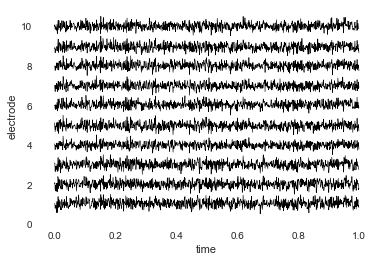

In [2]:
# simulate some data
bo_data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10)

# plot it
bo_data.plot_data()

# get just data
data = bo_data.get_data()

We'll also simulate some electrode locations

In [3]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0 -34  22 -15
1 -20  23  44
2  -6  -9  13
3  -4 -36 -33
4  -1  14 -46
5  22 -34  -6
6  23  -1  39
7  28 -44 -19
8  34 -46  11
9  38  21  13


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [4]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [5]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10.]
Sample Rate in Hz: [100]
Number of sessions: 1
Date created: Mon Mar 26 12:34:03 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [6]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Mon Mar 26 12:34:14 2018
Meta data: {}


You can also add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [7]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Mon Mar 26 12:34:20 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# Initialize brain objects

Brain objects can be initialized by passing a brain object (ending in `.bo`), but can also be initialized with a model object or nifti object by specifying `return_type` as `bo` in the load function.  

For example, you can load a nifti object as a brain object: 

In [8]:
bo_nii = se.load('example_nifti', return_type='bo')

Another feature, which can be particularly useful when working with lots of data, is loading only a subfield by specifiying `field`.  For example, if you only want to load locations:

In [9]:
bo_locs = se.load('example_data', field='locs') 

# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [10]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.050421,0.099244,0.214464,0.393154,0.666038,-0.255486,0.153665,-0.106903,-0.374938,-0.105174
1,-0.112214,0.324894,0.275519,-0.205756,-0.374161,-0.154170,-0.746154,-0.290769,-0.176139,0.259722
2,-1.064306,-1.211657,-1.369366,-1.505692,-1.531172,-0.867771,-2.027179,-1.220643,-1.312511,-0.736581
3,-0.448025,-0.298822,-0.381967,-0.037583,-0.230881,-0.048755,0.112036,-0.258298,-0.449528,-0.129064
4,-0.827615,-1.579661,-1.423919,-0.545757,-0.952673,-1.029085,-0.858474,-0.870601,-0.746470,-0.222771


or returned as a numpy array using the `get_data` method:

In [11]:
bo.get_data()

array([[-5.04214880e-02,  9.92442009e-02,  2.14464247e-01, ...,
        -1.06902822e-01, -3.74937784e-01, -1.05173997e-01],
       [-1.12213801e-01,  3.24894472e-01,  2.75518583e-01, ...,
        -2.90768765e-01, -1.76139163e-01,  2.59722335e-01],
       [-1.06430628e+00, -1.21165688e+00, -1.36936557e+00, ...,
        -1.22064327e+00, -1.31251078e+00, -7.36581483e-01],
       ...,
       [-6.62591175e-01,  9.48505989e-02, -3.72259933e-01, ...,
        -6.09918014e-01, -8.34754568e-01, -1.27755089e-01],
       [-4.87214127e-01, -1.32054588e+00, -8.88526560e-01, ...,
        -7.55150690e-04, -4.06705441e-01, -5.90043033e-01],
       [-8.76471148e-01, -9.37390769e-01, -1.03216267e+00, ...,
        -1.30680563e+00, -1.30127349e+00, -5.69702433e-01]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [12]:
bo.locs.head()

,x,y,z
0,-34,22,-15
1,-20,23,44
2,-6,-9,13
3,-4,-36,-33
4,-1,14,-46


In [13]:
bo.get_locs()

array([[-34,  22, -15],
       [-20,  23,  44],
       [ -6,  -9,  13],
       [ -4, -36, -33],
       [ -1,  14, -46],
       [ 22, -34,  -6],
       [ 23,  -1,  39],
       [ 28, -44, -19],
       [ 34, -46,  11],
       [ 38,  21,  13]])

Brain objects are iterable, so you index a brain object like this:

In [15]:
#return first time sample
bo[0]
#return first 3 time samples
bo[:3] 
#return first electrode
bo[:, 0] 
#returns first 3 timesamples/elecs
bo_i = bo[:3, :3] 
bo_i.get_data()

array([[-0.05042149,  0.0992442 ,  0.21446425],
       [-0.1122138 ,  0.32489447,  0.27551858],
       [-1.06430628, -1.21165688, -1.36936557]])

You can also pass a list of indices for either `times` or `locs` to the `get_slice` method and return a subset of the brain object

In [16]:
bo_s = bo.get_slice(sample_inds=[0,1,2], loc_inds=[0,1,2])
bo_s.get_data()

array([[-0.05042149,  0.0992442 ,  0.21446425],
       [-0.1122138 ,  0.32489447,  0.27551858],
       [-1.06430628, -1.21165688, -1.36936557]])

You can resample your data by specifying a new resample rate

In [19]:
bo.resample(64)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Mon Mar 26 12:34:20 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


You can also plot both the data and the electrode locations:

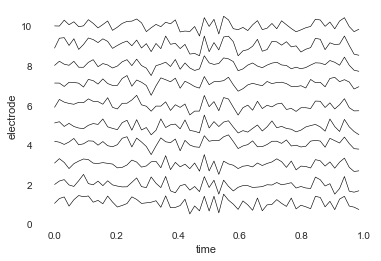

In [20]:
bo.plot_data()

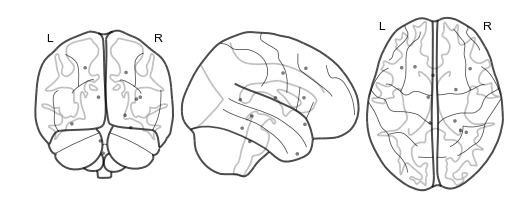

In [21]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [22]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [23]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Mon Mar 26 12:34:20 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [24]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [25]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [26]:
locs = bo.get_locs()

## `bo.get_slice()`
This method allows you to slice out time and locations from the brain object, and returns a brain object. This can occur in place if you set the flag `inplace=True`.

In [27]:
bo_slice = bo.get_slice(sample_inds=None, loc_inds=None, inplace=False)

## `bo.resample()`
This method allows you resample a brain object in place. 

In [28]:
bo.resample(resample_rate=None)

## `bo.plot_data()`

This method normalizes and plots data from brain object:

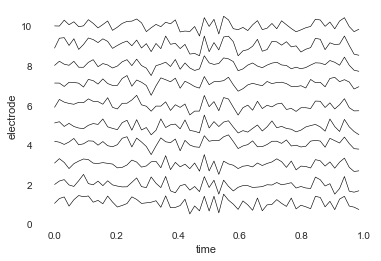

In [29]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

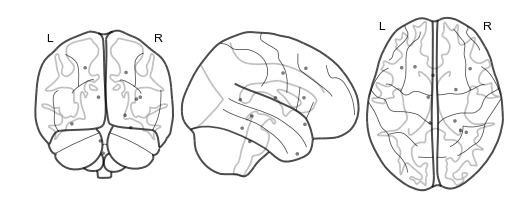

In [30]:
bo.plot_locs()

## `bo.to_nii()`

This method converts the brain object into supereeg's `nifti` class (a subclass of the `nibabel` nifti class).  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument. If no template is specified, it will use the gray matter masked MNI 152 brain downsampled to 6mm.  

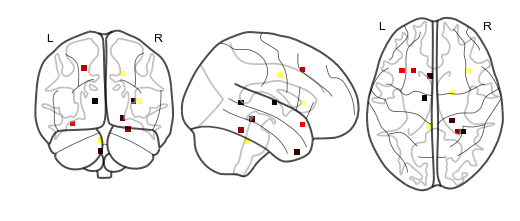

In [32]:
# convert to nifti
nii = bo.to_nii()

# plot first timepoint
nii.plot_glass_brain()

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template and resolution
# nii = bo.to_nii(template='/path/to/nifti/file.nii', vox_size=20)

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [31]:
#bo.save(fname='brain_object')